In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation

In [16]:
learning_stats_df = pd.read_csv('learning_stats.csv', header=None)
learning_stats_df.columns = ['it', 'loss', 'lr']
learning_stats_df

,it,loss,lr
0,100,0.06703,0.0001
1,200,0.03018,0.0001
2,300,0.02585,0.0001
3,400,0.02287,0.0001
4,500,0.02065,0.0001
...,...,...,...
95,9600,0.01093,0.0005
96,9700,0.01112,0.0005
97,9800,0.01146,0.0005
98,9900,0.01083,0.0005


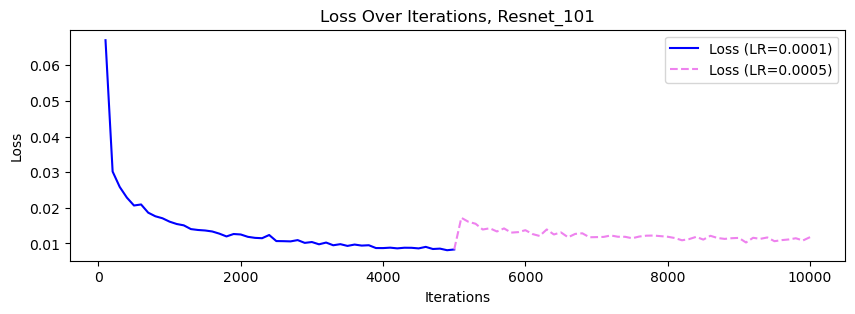

In [17]:
import matplotlib.pyplot as plt

# Create a new figure with specified size and resolution
fig, ax = plt.subplots(figsize=(10, 3), dpi=100)

# Separate data based on learning rate
low_lr = learning_stats_df[learning_stats_df['lr'] == 0.0001]
high_lr = learning_stats_df[learning_stats_df['lr'] == 0.0005]

# Ensure continuity by including the last point from the low_lr segment in high_lr
if not low_lr.empty and not high_lr.empty:
    transition_point = low_lr.iloc[-1]
    high_lr = pd.concat([transition_point.to_frame().T, high_lr])

# Plot loss for low learning rate
ax.plot(low_lr['it'], low_lr['loss'], color='blue', label='Loss (LR=0.0001)')

# Plot loss for high learning rate with a dashed line
ax.plot(high_lr['it'], high_lr['loss'], color='violet', linestyle='dashed', label='Loss (LR=0.0005)')

# Set labels and title
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
plt.title('Loss Over Iterations, Resnet_101')

# Add a legend
ax.legend()

# Show the plot
plt.show()


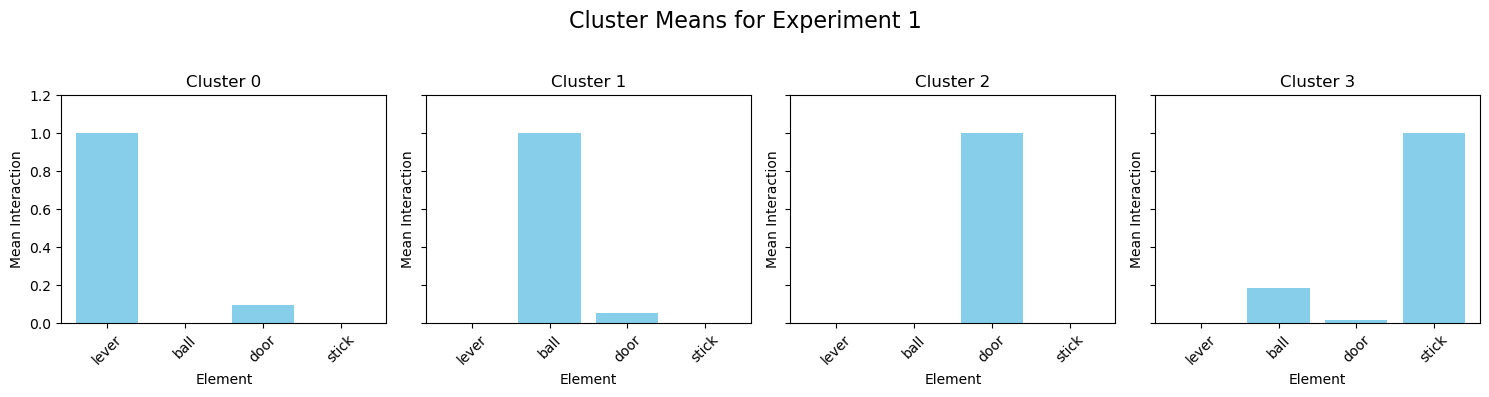

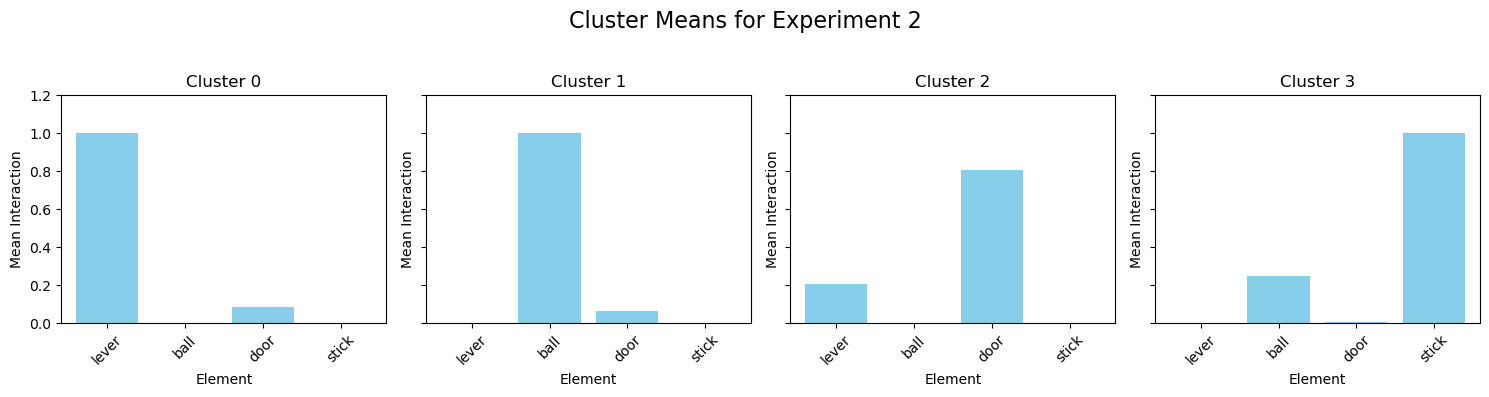

In [18]:
import matplotlib.pyplot as plt

# Cluster means from your experiments
experiment_1_means = {
    0: [1.0, 0.0, 0.096836, 0.0],
    1: [0.0, 1.0, 0.052133, 0.0],
    2: [0.0, 0.0, 1.0, 0.0],
    3: [0.0, 0.186441, 0.016949, 1.0]
}

experiment_2_means = {
    0: [1.0, 0.0, 0.083691, 0.0],
    1: [0.0, 1.0, 0.065491, 0.0],
    2: [0.208594, 0.0, 0.808863, 0.0],
    3: [0.0, 0.246324, 0.007353, 1.0]
}

elements = ['lever', 'ball', 'door', 'stick']

def plot_cluster_means(cluster_means, experiment_number):
    num_clusters = len(cluster_means)
    num_elements = len(elements)

    fig, axes = plt.subplots(nrows=1, ncols=num_clusters, figsize=(15, 4), sharey=True)
    fig.suptitle(f'Cluster Means for Experiment {experiment_number}', fontsize=16)

    for cluster_idx, means in cluster_means.items():
        ax = axes[cluster_idx]
        ax.bar(elements, means, color='skyblue')
        ax.set_title(f'Cluster {cluster_idx}')
        ax.set_xticks(range(num_elements))
        ax.set_xticklabels(elements, rotation=45)
        ax.set_ylim(0, 1.2)  # Set y-axis limit to clearly visualize the proportions
        ax.set_ylabel('Mean Interaction')
        ax.set_xlabel('Element')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
    plt.show()

# Plot for Experiment 1
plot_cluster_means(experiment_1_means, 1)

# Plot for Experiment 2
plot_cluster_means(experiment_2_means, 2)


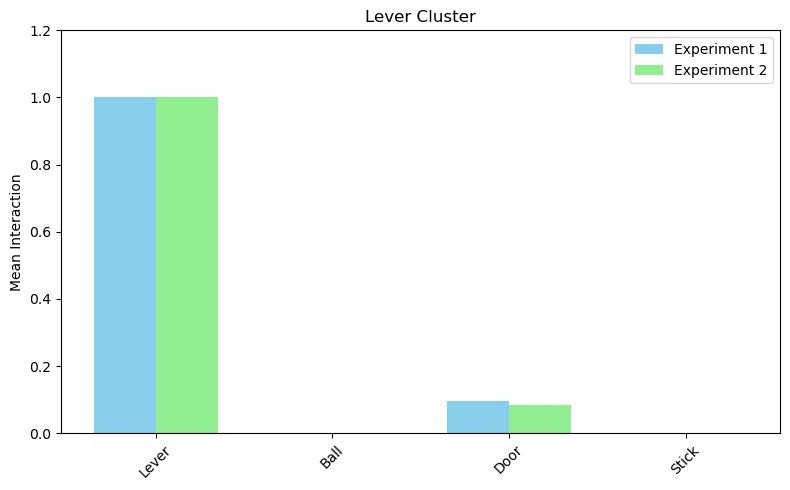

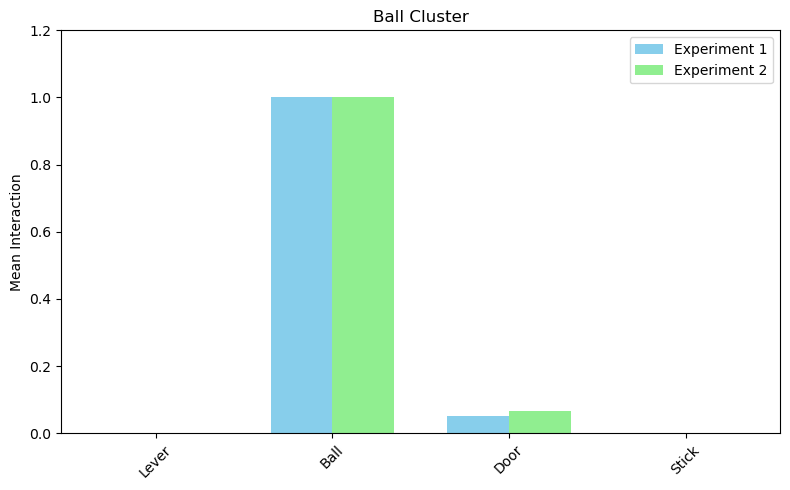

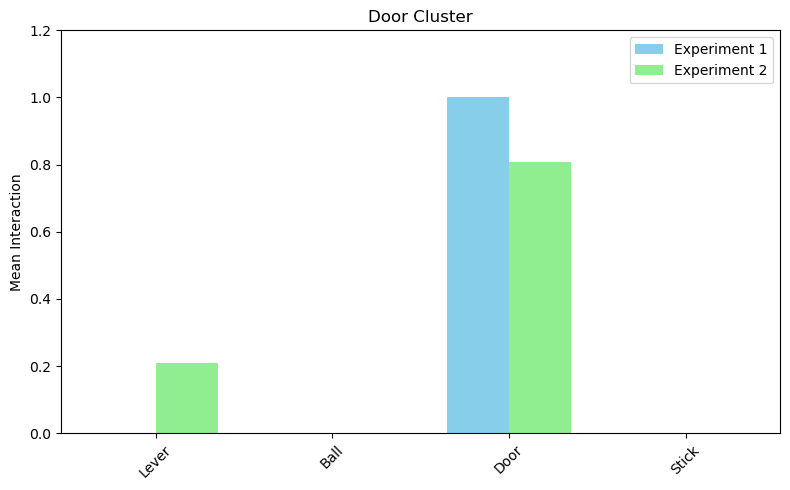

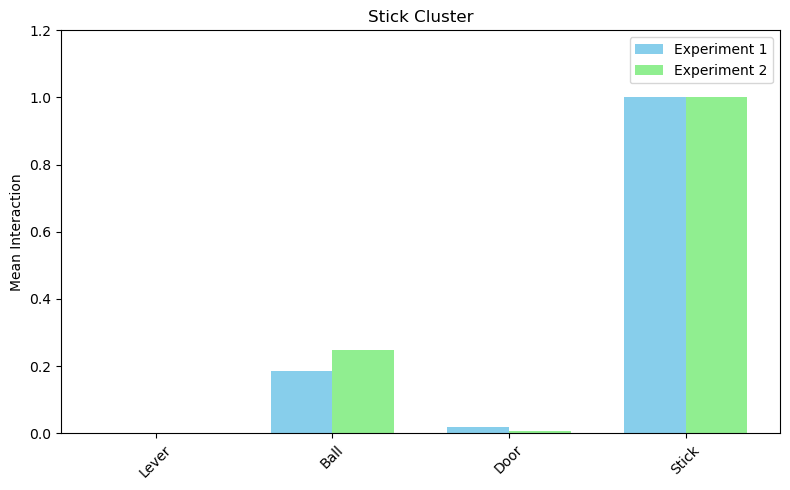

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Cluster means from your experiments
experiment_1_means = {
    0: [1.0, 0.0, 0.096836, 0.0],
    1: [0.0, 1.0, 0.052133, 0.0],
    2: [0.0, 0.0, 1.0, 0.0],
    3: [0.0, 0.186441, 0.016949, 1.0]
}

experiment_2_means = {
    0: [1.0, 0.0, 0.083691, 0.0],
    1: [0.0, 1.0, 0.065491, 0.0],
    2: [0.208594, 0.0, 0.808863, 0.0],
    3: [0.0, 0.246324, 0.007353, 1.0]
}

elements = ['Lever', 'Ball', 'Door', 'Stick']

def plot_cluster_comparison(cluster_idx, exp1_means, exp2_means, elements):
    width = 0.35  # the width of the bars
    x = np.arange(len(elements))  # label locations

    exp1_means_values = exp1_means[cluster_idx]
    exp2_means_values = exp2_means[cluster_idx]

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x - width/2, exp1_means_values, width, label='Experiment 1', color='skyblue')
    ax.bar(x + width/2, exp2_means_values, width, label='Experiment 2', color='lightgreen')

    ax.set_xticks(x)
    ax.set_xticklabels(elements, rotation=45)
    ax.set_ylim(0, 1.2)
    ax.set_ylabel('Mean Interaction')
    ax.set_title(f'{elements[cluster_idx]} Cluster')
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Plot each cluster separately
for cluster_idx in range(len(experiment_1_means)):
    plot_cluster_comparison(cluster_idx, experiment_1_means, experiment_2_means, elements)


In [20]:
incr_e1 = pd.read_csv('e1_incr', index_col=0)
incr_e2 = pd.read_csv('e2_incr', index_col=0)

In [21]:
open_times_e1 = {
    'Lever': 1863,
    'Stick': 13493,
    'Ball': 15538,
    'Door': 16438
}
open_times_e2 = {
    'Lever': 4326,
    'Stick': 17710,
    'Ball': 17869,
    'Door': 19040
}

In [22]:
open_lever = open_times_e1['Lever']
open_stick = open_times_e1['Stick']
open_ball = open_times_e1['Ball']
open_door = open_times_e1['Door']
interactions_lever = incr_e1.lever.iloc[-1]
interactions_stick = incr_e1.stick.iloc[-1]
interactions_ball = incr_e1.ball.iloc[-1]
interactions_door = incr_e1.door.iloc[-1]
on_task = len(incr_e1)

data = {
    'open_lever': [open_lever],
    'open_stick': [open_stick],
    'open_ball': [open_ball],
    'open_door': [open_door],
    'interactions_lever': [interactions_lever],
    'interactions_stick': [interactions_stick],
    'interactions_ball': [interactions_ball],
    'interactions_door': [interactions_door],
    'on_task': [on_task]
}

df_e1 = pd.DataFrame(data)
df_e1

,open_lever,open_stick,open_ball,open_door,interactions_lever,interactions_stick,interactions_ball,interactions_door,on_task
0,1863,13493,15538,16438,1043,236,888,1165,3139


In [23]:
open_lever = open_times_e2['Lever']
open_stick = open_times_e2['Stick']
open_ball = open_times_e2['Ball']
open_door = open_times_e2['Door']
interactions_lever = incr_e2.lever.iloc[-1]
interactions_stick = incr_e2.stick.iloc[-1]
interactions_ball = incr_e2.ball.iloc[-1]
interactions_door = incr_e2.door.iloc[-1]
on_task = len(incr_e2)

data = {
    'open_lever': [open_lever],
    'open_stick': [open_stick],
    'open_ball': [open_ball],
    'open_door': [open_door],
    'interactions_lever': [interactions_lever],
    'interactions_stick': [interactions_stick],
    'interactions_ball': [interactions_ball],
    'interactions_door': [interactions_door],
    'on_task': [on_task]
}

df_e2 = pd.DataFrame(data)
df_e2

,open_lever,open_stick,open_ball,open_door,interactions_lever,interactions_stick,interactions_ball,interactions_door,on_task
0,4326,17710,17869,19040,466,272,464,1835,2903


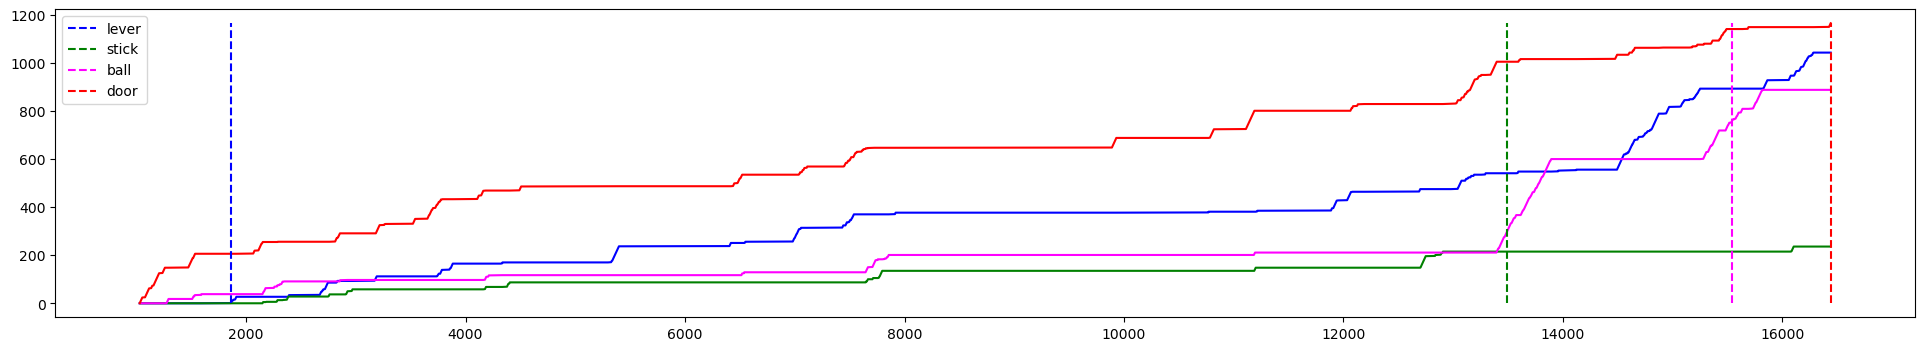

In [24]:
# Assuming annotator_lever_df is already defined and contains 'sum' and 'd' columns.
fig = plt.figure(figsize=(24, 4))
ax = fig.add_subplot()

ax.plot(incr_e1.lever, c='blue')
ax.plot(incr_e1.stick, c='green')
ax.plot(incr_e1.ball, c='magenta')
ax.plot(incr_e1.door, c='red')

ax.vlines(open_times_e1['Lever'], ymin=0, ymax = incr_e1.door.max(), linestyles='dashed', label='lever', color='blue')
ax.vlines(open_times_e1['Stick'], ymin=0, ymax = incr_e1.door.max(), linestyles='dashed', label='stick', color='green')
ax.vlines(open_times_e1['Ball'], ymin=0, ymax = incr_e1.door.max(), linestyles='dashed', label='ball', color='magenta')
ax.vlines(open_times_e1['Door'], ymin=0, ymax = incr_e1.door.max(), linestyles='dashed', label='door', color='red')

# for i in range(len(annotator_lever_df)):
    # if annotator_lever_df.iloc[i].d_lever:# and interactions['lever'].iloc[i]:
        # ax.vlines(i, ymin = 0, ymax = annotator_lever_df.iloc[i].norm_d, linestyles='dashed')
plt.legend()
plt.show()

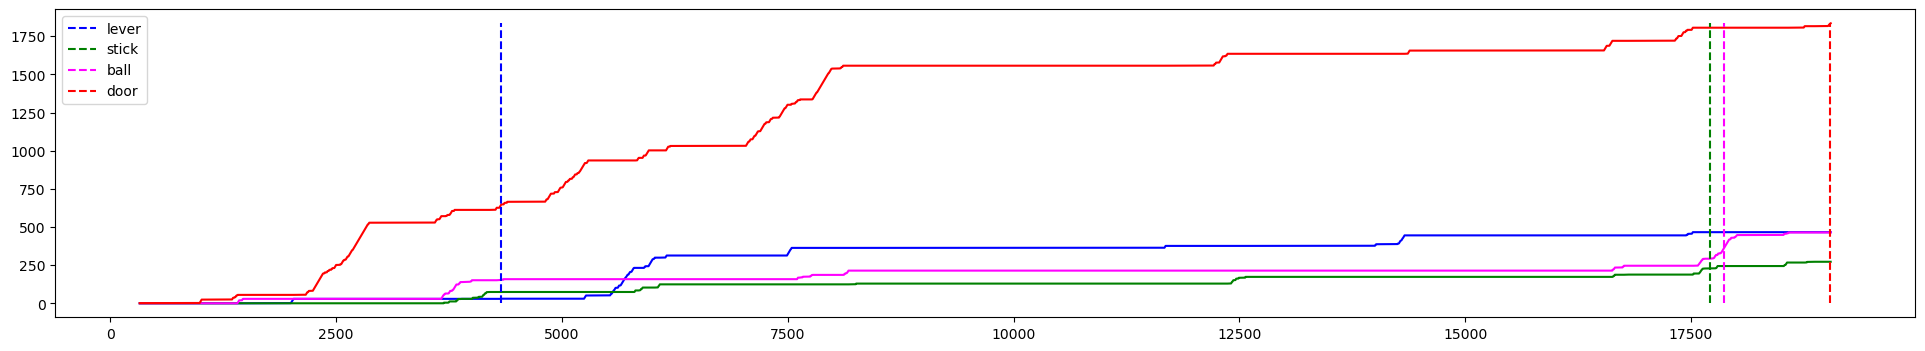

In [25]:
# Assuming annotator_lever_df is already defined and contains 'sum' and 'd' columns.
fig = plt.figure(figsize=(24, 4))
ax = fig.add_subplot()

ax.plot(incr_e2.lever, c='blue')
ax.plot(incr_e2.stick, c='green')
ax.plot(incr_e2.ball, c='magenta')
ax.plot(incr_e2.door, c='red')

ax.vlines(open_times_e2['Lever'], ymin=0, ymax = incr_e2.door.max(), linestyles='dashed', label='lever', color='blue')
ax.vlines(open_times_e2['Stick'], ymin=0, ymax = incr_e2.door.max(), linestyles='dashed', label='stick', color='green')
ax.vlines(open_times_e2['Ball'], ymin=0, ymax = incr_e2.door.max(), linestyles='dashed', label='ball', color='magenta')
ax.vlines(open_times_e2['Door'], ymin=0, ymax = incr_e2.door.max(), linestyles='dashed', label='door', color='red')

# for i in range(len(annotator_lever_df)):
    # if annotator_lever_df.iloc[i].d_lever:# and interactions['lever'].iloc[i]:
        # ax.vlines(i, ymin = 0, ymax = annotator_lever_df.iloc[i].norm_d, linestyles='dashed')
plt.legend()
plt.show()

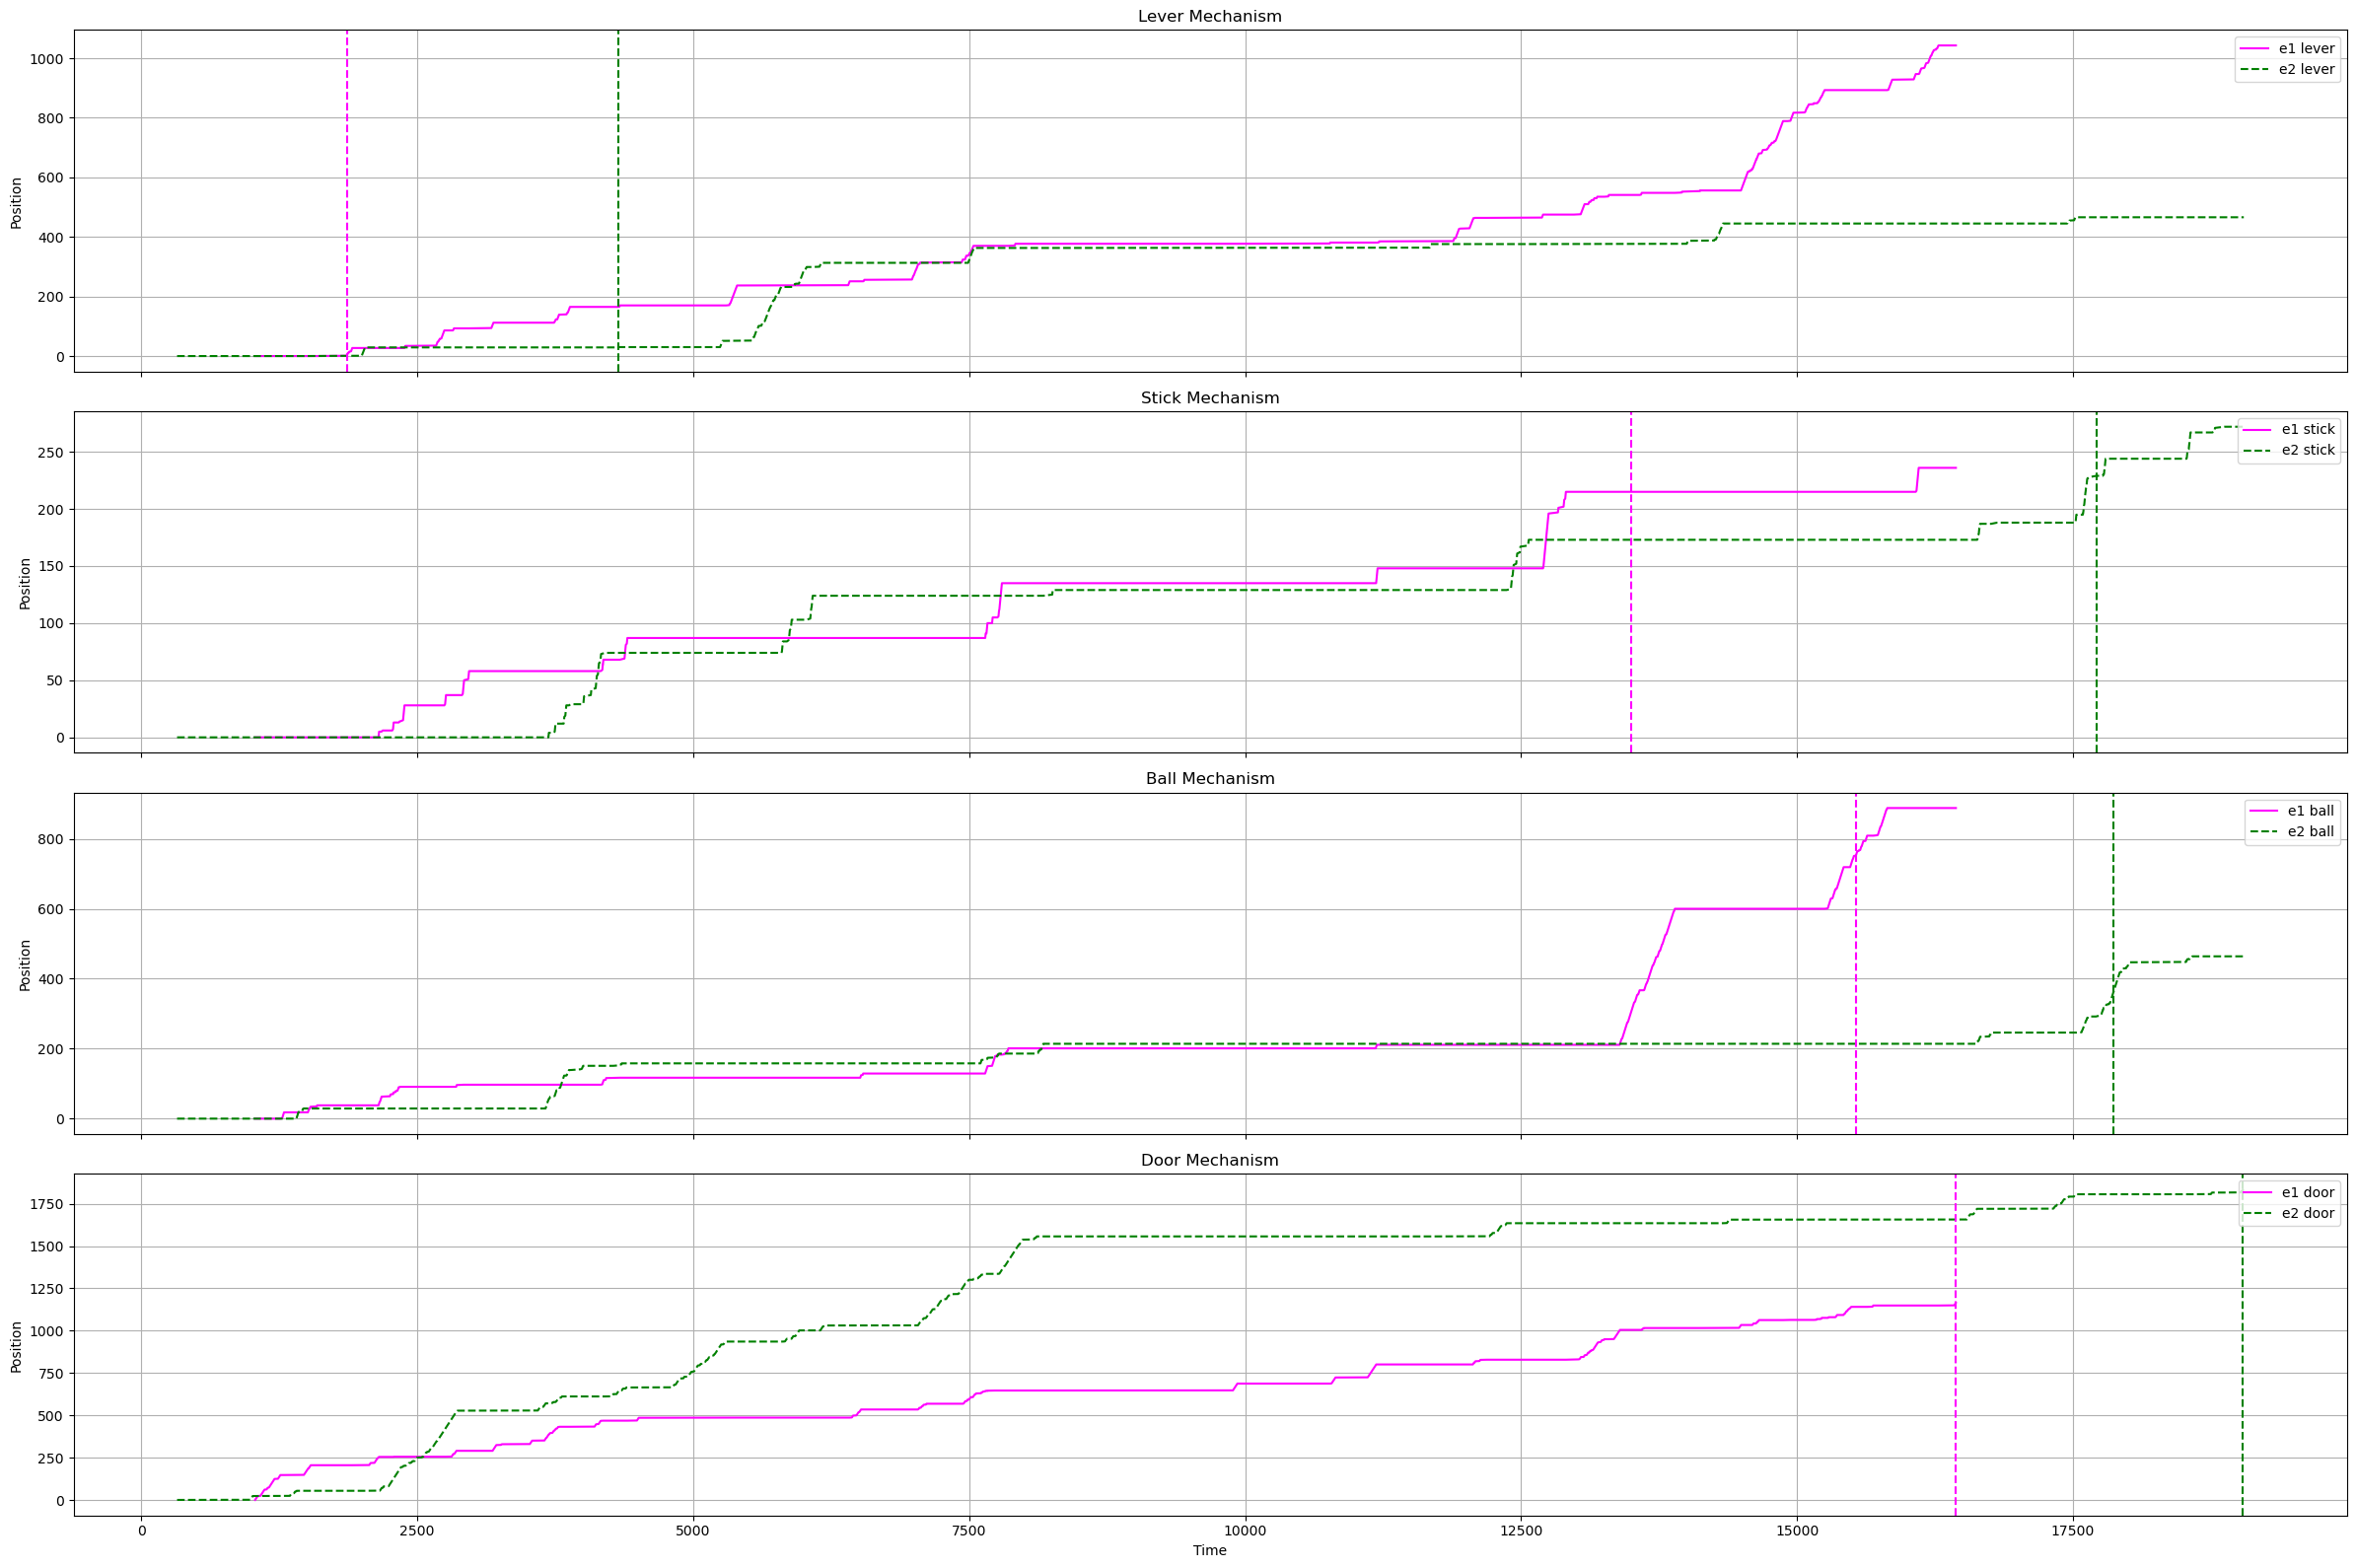

In [30]:
# Open times for each experiment
open_times_e1 = {
    'Lever': 1863,
    'Stick': 13493,
    'Ball': 15538,
    'Door': 16438
}
open_times_e2 = {
    'Lever': 4326,
    'Stick': 17710,
    'Ball': 17869,
    'Door': 19040
}

# Set up the plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(24, 16), sharex=True)



# Plot each mechanism
for idx, mechanism in enumerate(['lever', 'stick', 'ball', 'door']):
    ax = axes[idx]
    
    # Plot data for experiment 1
    ax.plot(incr_e1[mechanism], label=f'e1 {mechanism}', color='magenta', alpha=1)
    
    # Plot data for experiment 2
    ax.plot(incr_e2[mechanism], label=f'e2 {mechanism}', linestyle='--', color='green', alpha=1)
    
    # Add vertical lines for open times
    ax.axvline(x=open_times_e1[mechanism.capitalize()], linestyle='dashed', color='magenta', alpha=1)
    ax.axvline(x=open_times_e2[mechanism.capitalize()], linestyle='dashed', color='green', alpha=1)
    
    # Add labels and legend
    ax.set_title(f'{mechanism.capitalize()} Mechanism')
    ax.legend(loc='upper right')
    ax.set_ylabel('Position')
    ax.grid(True)

axes[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()
